# Reflectancia del água y clorofila

En este notebook explorará el comportamiento de la reflectancia saliente del agua al variar la concentración de clorofila.

## Introduccion a python

Si nunca uso un notebook de jupyter es muy sencillo. Hay celdas con texto, como esta, y celdas con codigo, como la de abajo.

Para ejecutar una celda con código haga click en ella y luego en `>|run` en la barra de herramientas o `ctrl+enter`.

In [21]:
2+2

4

La siguiente celda es importante, ya que carga todas las herramientas que utilizará. Haga click en `>|run` o `ctrl+enter`

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interpn

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

La siguiente celda configura las funciones y tablas de datos que utilizará durante la simulación

In [23]:
chl_range = np.logspace(-3,2,11)
sed_range = np.array([0,1,10,100,1000])

wl = np.linspace(405,700,20)
wl = np.append(wl, [750, 865, 900])

rho_arr = np.load("rho_arr.npy")

def f(chl, sed):
    return interpn((chl_range, sed_range), rho_arr[:,:,0,0,:], (chl,sed))[0]

list_satellite = np.load('list_satellite.npy',allow_pickle='TRUE').item()
list_satellite[None] = None

list_data = np.load('list_data.npy',allow_pickle='TRUE').item()

def plt_f(chl, sed=0, satellite="czcs", data=None, compute=False):
    if data is not None:
        plt.plot(list_satellite["seawifs"],list_data[data], 'ko')
    if compute is True:
        if satellite is not None:
            plt.plot(list_satellite[satellite], interp1d(wl, f(chl, sed), fill_value="extrapolate")(list_satellite[satellite]), 'ko')
    elif compute == "data":
        if satellite is not None:
            plt.plot(list_satellite[satellite], interp1d(wl, f(c, 0), fill_value="extrapolate")(list_satellite[satellite]), 'ko')

    plt.plot(wl, f(chl, sed))
    plt.xlabel(rf"$\lambda$ [nm]"), plt.ylim(bottom=-0.003, top=0.063), plt.ylabel(rf"$\rho$")
    plt.show()
    return None

## Agua y clorofila

la concetración de clorofila que tenemos en agua va a producir que cambie la firma espectral.

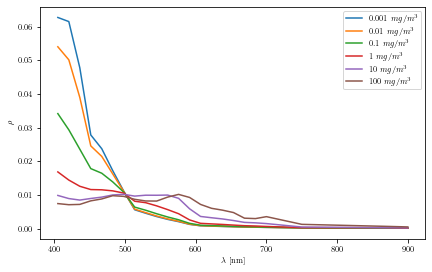

In [27]:
for c in [0.001,0.01,0.1,1,10,100]:
    plt.plot(wl, f(c, 0), label=rf"{c} $mg/m^3$")
plt.legend();plt.xlabel(rf"$\lambda$ [nm]");plt.ylabel(rf"$\rho$");plt.show()

### Actividad 1: explore la firma espectral para distintas concentraciones de clorofila.

In [28]:
interact(plt_f, chl = widgets.BoundedFloatText(value=5, min=0.001, max=100, description="Chla [mg/m3]"), 
                sed = fixed(0), data=fixed(None), compute=fixed(False),
                satellite=fixed(None))

interactive(children=(BoundedFloatText(value=5.0, description='Chla [mg/m3]', min=0.001), Output()), _dom_clas…

<function __main__.plt_f(chl, sed=0, satellite='czcs', data=None, compute=False)>

### Actividad: encuentre que contenido de clorofila reproduce los datos CZCS

In [ ]:
c = np.round(np.random.uniform(0,5),1); s = 0

In [ ]:
interact(plt_f, chl = widgets.BoundedFloatText(value=5, min=0.001, max=100, description="Chla [mg/m3]"), 
                sed=fixed(0),data=fixed(None), compute=fixed("data"),
                satellite=fixed("czcs"));

### Actividad 2: encuentre que contenido de clorofila reproduce los datos de seawifs

In [ ]:
interact(plt_f, chl = widgets.BoundedFloatText(value=5, min=0.001, max=100, description="Chla [mg/m3]"), 
                sed = fixed(0), data=fixed(None), compute=fixed("data"),
                        satellite=widgets.Dropdown(options=list_satellite.keys(), description="Satélite"));

### Actividad 3: encuentre que contenido de clorofila que reproduce los datos de seawifs

In [ ]:
interact(plt_f, chl = widgets.BoundedFloatText(value=5, min=0.001, max=100, description="Chla [mg/m3]"), 
                sed = fixed(0), data=widgets.Dropdown(options=list_data.keys(),description="Datos"),
                compute=fixed("data"), satellite=fixed(None));

### Adicional 1: Puede ahora trabajar tanto con la variable cconcentración de clorofila como concentración de sedimientos

In [ ]:
interact(plt_f, chl = widgets.BoundedFloatText(value=5, min=0.001, max=30, description="Chla [mg/m3]"), 
                sed = widgets.BoundedFloatText(value=0, min=0.0, max=1e3, description="Sed [mg/l]"), 
                data=fixed(None), compute=widgets.Checkbox(description="Calcular reflectancia del satélite"),
                satellite=widgets.Dropdown(options=list_satellite.keys(), description="Satélite"));